# Task name : Iris Flowers Classification ML Project || February 2022
Perform by : Unmesh Ganesh Bhosale

Description Of Task:

This particular ML projet is usually referred to as the "Hello World" of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Dataset : http://archive.ics.uci.edu/ml/datasets/Iris


# Importing Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading Data

In [9]:
iris = pd.read_csv("Iris.csv")


In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# To display stats about data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Understanding the Data

In [12]:
iris.shape

(150, 5)

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Checking the number of rows that belongs to each class

In [14]:
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Data Visualization

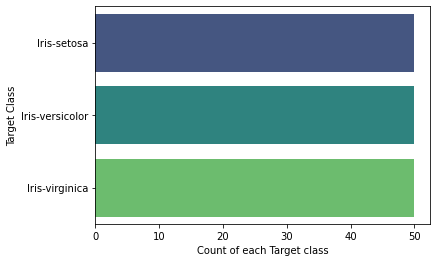

In [15]:
# Check the distribution of target variable to see if it's a case of unbalanced class
sns.countplot(y = 'species', data = iris, palette="viridis")
plt.xlabel("Count of each Target class")
plt.ylabel("Target Class")
plt.show()

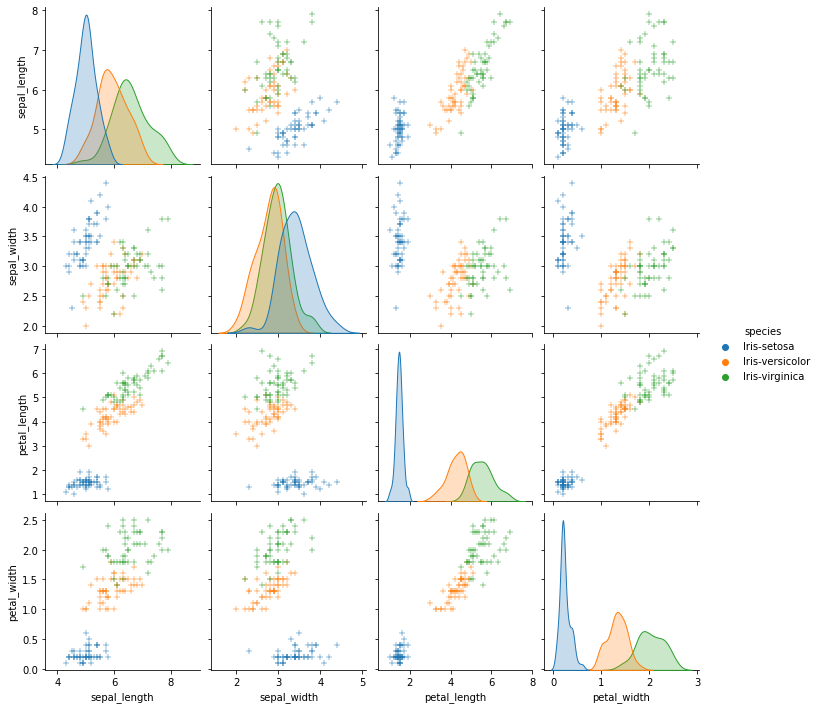

In [16]:
sns.pairplot(iris, hue='species', markers='+')
plt.show()

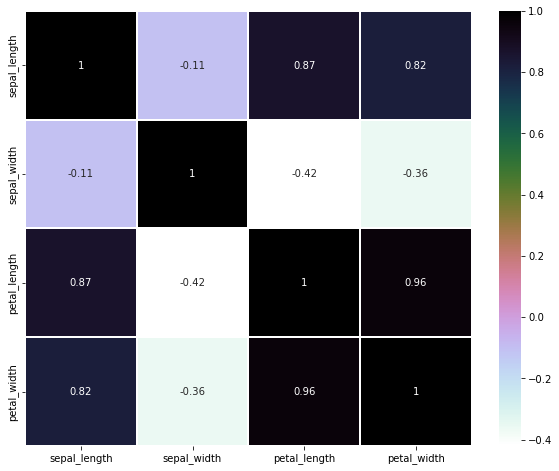

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r', linewidths=0.4)
plt.show()

# Model Building
Splitting the dataset

In [18]:
X = iris.drop(['species'], axis=1)
y = iris['species']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.33)

In [20]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
knn = knn_model.predict(X_test)

# Prediction and Performance Metric

In [22]:
knn_predict = knn_model.predict(X_test)

In [23]:
print(f"""
KNN Accuracy: {accuracy_score(y_test, knn_predict)}
""")


KNN Accuracy: 0.98



# Predict method of the knn object

In [24]:
print(f"""
KNN Confusion Matrix: 
{confusion_matrix(y_test, knn_predict)},
""")


KNN Confusion Matrix: 
[[17  0  0]
 [ 0 16  1]
 [ 0  0 16]],



In [25]:
print(f"""
KNN Classification Report: 
{classification_report(y_test, knn_predict)},
""")


KNN Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50
,

